In [178]:
import os
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.data import Dataset
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm

In [179]:
df = pd.read_csv('Dataset_spine.csv')
df.head(10)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal,Attribute1 = pelvic_incidence (numeric)
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,Abnormal,Attribute2 = pelvic_tilt (numeric)
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,Abnormal,Attribute3 = lumbar_lordosis_angle (numeric)
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,Abnormal,Attribute4 = sacral_slope (numeric)
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,Abnormal,Attribute5 = pelvic_radius (numeric)


In [180]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [181]:
df['Class_att'].replace({"Abnormal": True, "Normal": False}, inplace=True)

In [182]:
df['Class_att'] = df['Class_att'].astype(float)
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1.0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1.0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1.0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1.0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1.0


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
Col1         310 non-null float64
Col2         310 non-null float64
Col3         310 non-null float64
Col4         310 non-null float64
Col5         310 non-null float64
Col6         310 non-null float64
Col7         310 non-null float64
Col8         310 non-null float64
Col9         310 non-null float64
Col10        310 non-null float64
Col11        310 non-null float64
Col12        310 non-null float64
Class_att    310 non-null float64
dtypes: float64(13)
memory usage: 31.6 KB


In [184]:
k=len(df.Class_att)
i=0
for j in range(len(df.Class_att)):
    if df.Class_att[j]==1:
        i+=1
print("Amount of Data     :", k)
print("Amount of Abnormal :", i)
print("Amount of Normal   :", (k-i))

Amount of Data     : 310
Amount of Abnormal : 210
Amount of Normal   : 100


In [185]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [186]:
df_train = df_train.reindex(np.random.permutation(df_train.index))

In [187]:
df_train.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
58,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,0.016747,26.8235,16.2905,14.76132,-24.294191,23.8843,1.0
259,63.619192,16.934508,49.349262,46.684684,117.089747,-0.357812,0.953932,15.5713,9.9518,15.09867,-26.758834,40.4129,0.0
196,63.772391,12.763385,65.360524,51.009006,89.822741,55.995454,0.276928,24.5529,10.4232,14.97470,-22.286220,21.7822,1.0
163,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,0.542816,22.3317,8.8519,11.48960,-6.754004,32.5082,1.0
127,80.433428,16.998479,66.536018,63.434949,116.438981,57.781250,0.095806,26.7780,18.2886,11.96597,-25.207568,21.5450,1.0


In [188]:
# Function to Calculate the Z-Scores of each columns in df_feature
def normalize(df, df_feature):
    for i in df_feature.columns:
        df[i] = (df[i]-df[i].mean())/df[i].std()
    return df

In [189]:
# Calculate the Z-scores of each column in the training set and

df_feature = df.drop(['Class_att'], axis=1)
df_train_norm = normalize(df_train, df_feature)
df_test_norm = normalize(df_test, df_feature)
# Examine some of the values of the normalized training set. Notice that most 
# Z-scores fall between -2 and +2.
df_train_norm.head()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
58,-1.029273,0.216387,-0.932610,-1.470714,0.584949,-0.742681,-1.568638,0.603786,0.949383,0.988643,-0.857447,-0.160540,1.0
259,0.156583,-0.064585,-0.147079,0.246557,-0.012229,-0.678035,1.660633,-0.690017,-0.910877,1.107211,-1.059184,1.396667,0.0
196,0.165482,-0.494090,0.729436,0.567409,-2.111571,0.744295,-0.672128,0.342707,-0.772532,1.063640,-0.693089,-0.358585,1.0
163,3.194646,2.054659,1.355675,2.600328,-0.966248,1.380419,0.244045,0.087309,-1.233672,-0.161260,0.578263,0.651942,1.0
127,1.133232,-0.057997,0.793787,1.489381,-0.062333,0.789368,-1.296223,0.598554,1.535779,0.006169,-0.932209,-0.380932,1.0


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


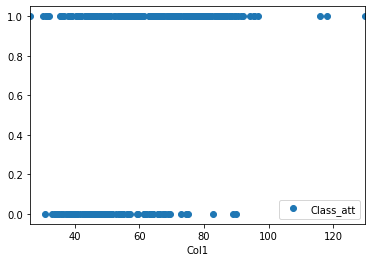

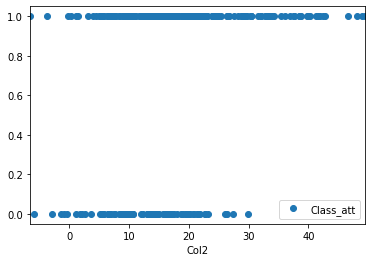

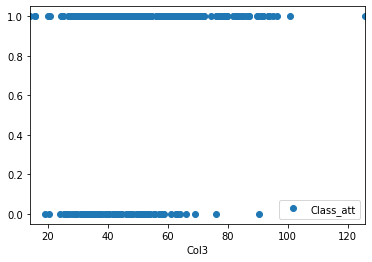

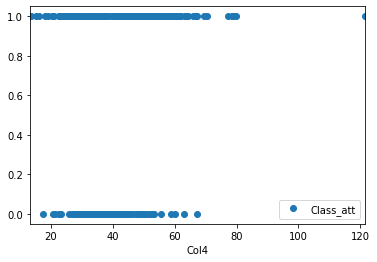

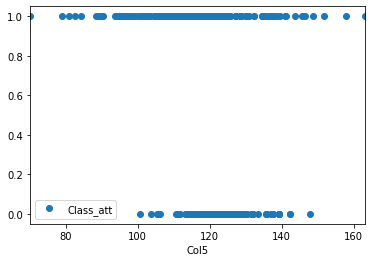

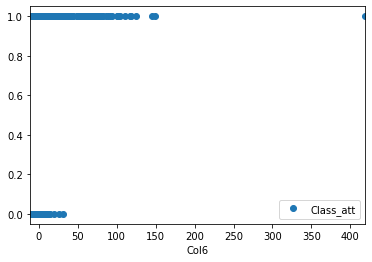

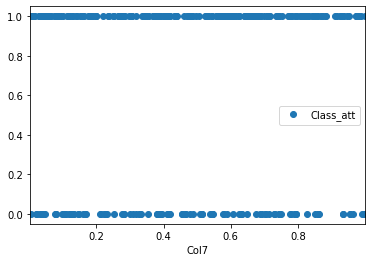

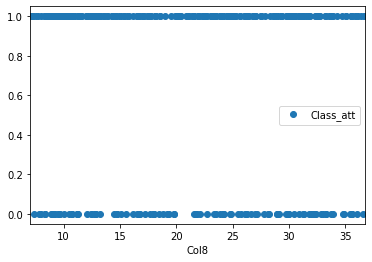

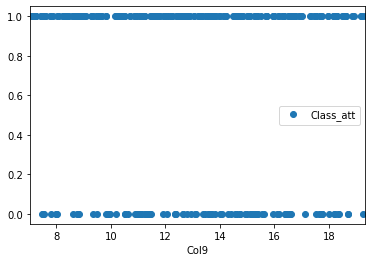

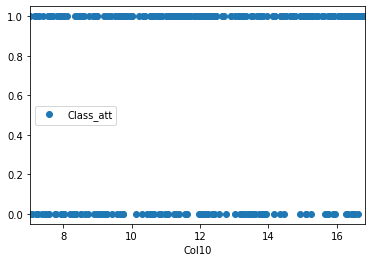

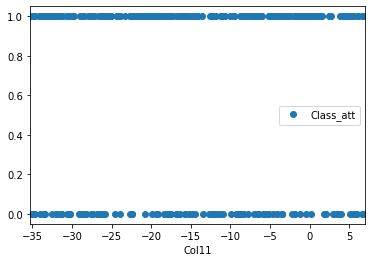

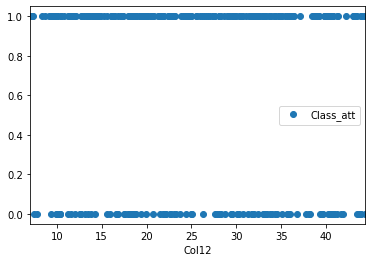

In [190]:
# Feature Selection
print(df.plot(x='Col1', y='Class_att', style='o'))
print(df.plot(x='Col2', y='Class_att', style='o'))
print(df.plot(x='Col3', y='Class_att', style='o'))
print(df.plot(x='Col4', y='Class_att', style='o'))
print(df.plot(x='Col5', y='Class_att', style='o'))
print(df.plot(x='Col6', y='Class_att', style='o'))
print(df.plot(x='Col7', y='Class_att', style='o'))
print(df.plot(x='Col8', y='Class_att', style='o'))
print(df.plot(x='Col9', y='Class_att', style='o'))
print(df.plot(x='Col10', y='Class_att', style='o'))
print(df.plot(x='Col11', y='Class_att', style='o'))
print(df.plot(x='Col12', y='Class_att', style='o'))

In [191]:
feature_set = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6']
# feature_set = ['Col7', 'Col8', 'Col9', 'Col10', 'Col11', 'Col12']

In [192]:
def tf_feature_columns(input_features):
    feature_columns = []
    for my_feature in input_features:
        feature_columns.append(tf.feature_column.numeric_column(my_feature))
    return feature_columns

In [193]:
tf_feature_columns = tf_feature_columns(feature_set)
feature_layer = layers.DenseFeatures(tf_feature_columns)
feature_layer(dict(df_train_norm))

<tf.Tensor: shape=(248, 6), dtype=float32, numpy=
array([[-1.0292732 ,  0.21638656, -0.93261015, -1.4707136 ,  0.58494866,
        -0.7426806 ],
       [ 0.15658309, -0.06458464, -0.14707907,  0.24655652, -0.01222927,
        -0.6780355 ],
       [ 0.16548158, -0.49409032,  0.729436  ,  0.5674095 , -2.1115708 ,
         0.744295  ],
       ...,
       [-1.3287945 , -0.9535186 , -1.4123381 , -1.010331  ,  0.5046694 ,
        -0.57092935],
       [-1.5730351 , -1.2858766 , -0.84276307, -1.082839  ,  0.51558924,
        -0.6740334 ],
       [ 0.28068015, -0.7958486 , -0.06640702,  0.9320001 , -0.9896266 ,
         0.32309145]], dtype=float32)>

In [194]:
#@title Define the functions that create and train a model.
def create_model(my_learning_rate, feature_layer, my_metrics):
  """Create and compile a simple classification model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the feature layer (the list of features and how they are represented)
  # to the model.
  model.add(feature_layer)

  # Funnel the regression value through a sigmoid function.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

  # Call the compile method to construct the layers into a model that
  # TensorFlow can execute.  Notice that we're using a different loss
  # function for classification than for regression.    
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model        


def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  """Feed a dataset into the model in order to train it."""

  # The x parameter of tf.keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.  Here, we're passing
  # every column in the dataset. Note that the feature_layer will filter
  # away most of those columns, leaving only the desired columns and their
  # representations as features.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the classification metric for each epoch.
  hist = pd.DataFrame(history.history)

  return epochs, hist  

print("Defined the create_model and train_model functions.")   

Defined the create_model and train_model functions.


In [195]:
#@title Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")

Defined the plot_curve function.


Train on 248 samples
Epoch 1/250
248/248 [==============================] - 0s 1ms/sample - loss: 0.8985 - accuracy: 0.4194
Epoch 2/250
248/248 [==============================] - 0s 28us/sample - loss: 0.8863 - accuracy: 0.4194
Epoch 3/250
248/248 [==============================] - 0s 36us/sample - loss: 0.8775 - accuracy: 0.4073
Epoch 4/250
248/248 [==============================] - 0s 32us/sample - loss: 0.8701 - accuracy: 0.4194
Epoch 5/250
248/248 [==============================] - 0s 36us/sample - loss: 0.8644 - accuracy: 0.4194
Epoch 6/250
248/248 [==============================] - 0s 40us/sample - loss: 0.8584 - accuracy: 0.4194
Epoch 7/250
248/248 [==============================] - 0s 44us/sample - loss: 0.8524 - accuracy: 0.4315
Epoch 8/250
248/248 [==============================] - 0s 52us/sample - loss: 0.8461 - accuracy: 0.4395
Epoch 9/250
248/248 [==============================] - 0s 48us/sample - loss: 0.8400 - accuracy: 0.4395
Epoch 10/250
248/248 [======================

248/248 [==============================] - 0s 44us/sample - loss: 0.5881 - accuracy: 0.7258
Epoch 79/250
248/248 [==============================] - 0s 36us/sample - loss: 0.5867 - accuracy: 0.7298
Epoch 80/250
248/248 [==============================] - ETA: 0s - loss: 0.5976 - accuracy: 0.71 - 0s 40us/sample - loss: 0.5839 - accuracy: 0.7298
Epoch 81/250
248/248 [==============================] - 0s 40us/sample - loss: 0.5825 - accuracy: 0.7298
Epoch 82/250
248/248 [==============================] - 0s 36us/sample - loss: 0.5805 - accuracy: 0.7298
Epoch 83/250
248/248 [==============================] - 0s 44us/sample - loss: 0.5780 - accuracy: 0.7379
Epoch 84/250
248/248 [==============================] - 0s 44us/sample - loss: 0.5759 - accuracy: 0.7379
Epoch 85/250
248/248 [==============================] - 0s 40us/sample - loss: 0.5739 - accuracy: 0.7339
Epoch 86/250
248/248 [==============================] - 0s 36us/sample - loss: 0.5718 - accuracy: 0.7379
Epoch 87/250
248/248 [====

248/248 [==============================] - 0s 36us/sample - loss: 0.4979 - accuracy: 0.7863
Epoch 155/250
248/248 [==============================] - 0s 36us/sample - loss: 0.4971 - accuracy: 0.7903
Epoch 156/250
248/248 [==============================] - 0s 32us/sample - loss: 0.4965 - accuracy: 0.7863
Epoch 157/250
248/248 [==============================] - 0s 32us/sample - loss: 0.4957 - accuracy: 0.7863
Epoch 158/250
248/248 [==============================] - 0s 36us/sample - loss: 0.4951 - accuracy: 0.7863
Epoch 159/250
248/248 [==============================] - 0s 36us/sample - loss: 0.4945 - accuracy: 0.7944
Epoch 160/250
248/248 [==============================] - 0s 36us/sample - loss: 0.4938 - accuracy: 0.7863
Epoch 161/250
248/248 [==============================] - 0s 44us/sample - loss: 0.4931 - accuracy: 0.7863
Epoch 162/250
248/248 [==============================] - 0s 36us/sample - loss: 0.4925 - accuracy: 0.7903
Epoch 163/250
248/248 [==============================] - 0s 

248/248 [==============================] - 0s 52us/sample - loss: 0.4588 - accuracy: 0.7863
Epoch 232/250
248/248 [==============================] - 0s 44us/sample - loss: 0.4584 - accuracy: 0.7863
Epoch 233/250
248/248 [==============================] - 0s 36us/sample - loss: 0.4580 - accuracy: 0.7903
Epoch 234/250
248/248 [==============================] - 0s 40us/sample - loss: 0.4577 - accuracy: 0.7903
Epoch 235/250
248/248 [==============================] - 0s 32us/sample - loss: 0.4572 - accuracy: 0.7903
Epoch 236/250
248/248 [==============================] - 0s 52us/sample - loss: 0.4568 - accuracy: 0.7903
Epoch 237/250
248/248 [==============================] - 0s 52us/sample - loss: 0.4566 - accuracy: 0.7903
Epoch 238/250
248/248 [==============================] - 0s 48us/sample - loss: 0.4562 - accuracy: 0.7903
Epoch 239/250
248/248 [==============================] - 0s 56us/sample - loss: 0.4558 - accuracy: 0.7903
Epoch 240/250
248/248 [==============================] - 0s 

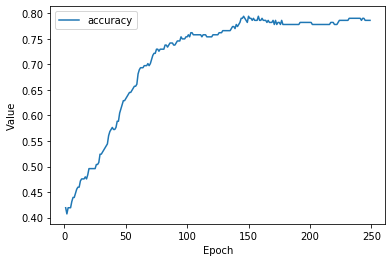

In [211]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 250
batch_size = 80
label_name = "Class_att"
# classification_threshold = 0.5

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy'),
          ]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, df_train_norm, epochs, 
                           label_name, batch_size)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

In [156]:
# Evaluate the model against the test set
features = {name:np.array(value) for name, value in df_test_norm.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

62/62 [==============================] - 0s 1ms/sample - loss: 0.5855 - accuracy: 0.7581


[0.5854780077934265, 0.7580645]

Train on 248 samples
Epoch 1/600
248/248 [==============================] - 1s 2ms/sample - loss: 0.7055 - accuracy: 0.7056 - precision: 0.7056 - recall: 1.0000
Epoch 2/600
248/248 [==============================] - 0s 32us/sample - loss: 0.6974 - accuracy: 0.7056 - precision: 0.7056 - recall: 1.0000
Epoch 3/600
248/248 [==============================] - 0s 36us/sample - loss: 0.6920 - accuracy: 0.7056 - precision: 0.7056 - recall: 1.0000
Epoch 4/600
248/248 [==============================] - 0s 32us/sample - loss: 0.6878 - accuracy: 0.7056 - precision: 0.7056 - recall: 1.0000
Epoch 5/600
248/248 [==============================] - 0s 44us/sample - loss: 0.6837 - accuracy: 0.7056 - precision: 0.7056 - recall: 1.0000
Epoch 6/600
248/248 [==============================] - 0s 48us/sample - loss: 0.6797 - accuracy: 0.7056 - precision: 0.7056 - recall: 1.0000
Epoch 7/600
248/248 [==============================] - 0s 56us/sample - loss: 0.6762 - accuracy: 0.7056 - precision: 0.7056 - recall: 

248/248 [==============================] - 0s 40us/sample - loss: 0.5607 - accuracy: 0.7218 - precision: 0.7265 - recall: 0.9714
Epoch 59/600
248/248 [==============================] - 0s 36us/sample - loss: 0.5592 - accuracy: 0.7218 - precision: 0.7265 - recall: 0.9714
Epoch 60/600
248/248 [==============================] - 0s 40us/sample - loss: 0.5577 - accuracy: 0.7177 - precision: 0.7253 - recall: 0.9657
Epoch 61/600
248/248 [==============================] - 0s 44us/sample - loss: 0.5564 - accuracy: 0.7137 - precision: 0.7241 - recall: 0.9600
Epoch 62/600
248/248 [==============================] - 0s 40us/sample - loss: 0.5551 - accuracy: 0.7177 - precision: 0.7273 - recall: 0.9600
Epoch 63/600
248/248 [==============================] - 0s 40us/sample - loss: 0.5538 - accuracy: 0.7177 - precision: 0.7273 - recall: 0.9600
Epoch 64/600
248/248 [==============================] - 0s 36us/sample - loss: 0.5525 - accuracy: 0.7177 - precision: 0.7273 - recall: 0.9600
Epoch 65/600
248/24

248/248 [==============================] - 0s 32us/sample - loss: 0.5000 - accuracy: 0.7500 - precision: 0.7534 - recall: 0.9600
Epoch 116/600
248/248 [==============================] - 0s 36us/sample - loss: 0.4992 - accuracy: 0.7500 - precision: 0.7534 - recall: 0.9600
Epoch 117/600
248/248 [==============================] - 0s 36us/sample - loss: 0.4983 - accuracy: 0.7460 - precision: 0.7500 - recall: 0.9600
Epoch 118/600
248/248 [==============================] - 0s 32us/sample - loss: 0.4975 - accuracy: 0.7460 - precision: 0.7500 - recall: 0.9600
Epoch 119/600
248/248 [==============================] - 0s 36us/sample - loss: 0.4967 - accuracy: 0.7419 - precision: 0.7467 - recall: 0.9600
Epoch 120/600
248/248 [==============================] - 0s 36us/sample - loss: 0.4958 - accuracy: 0.7379 - precision: 0.7434 - recall: 0.9600
Epoch 121/600
248/248 [==============================] - 0s 36us/sample - loss: 0.4950 - accuracy: 0.7379 - precision: 0.7434 - recall: 0.9600
Epoch 122/600

248/248 [==============================] - 0s 44us/sample - loss: 0.4606 - accuracy: 0.7540 - precision: 0.7545 - recall: 0.9657
Epoch 172/600
248/248 [==============================] - 0s 40us/sample - loss: 0.4601 - accuracy: 0.7540 - precision: 0.7545 - recall: 0.9657
Epoch 173/600
248/248 [==============================] - 0s 32us/sample - loss: 0.4594 - accuracy: 0.7621 - precision: 0.7613 - recall: 0.9657
Epoch 174/600
248/248 [==============================] - 0s 36us/sample - loss: 0.4588 - accuracy: 0.7581 - precision: 0.7578 - recall: 0.9657
Epoch 175/600
248/248 [==============================] - 0s 48us/sample - loss: 0.4581 - accuracy: 0.7621 - precision: 0.7613 - recall: 0.9657
Epoch 176/600
248/248 [==============================] - 0s 44us/sample - loss: 0.4575 - accuracy: 0.7621 - precision: 0.7613 - recall: 0.9657
Epoch 177/600
248/248 [==============================] - 0s 40us/sample - loss: 0.4570 - accuracy: 0.7621 - precision: 0.7613 - recall: 0.9657
Epoch 178/600

248/248 [==============================] - 0s 36us/sample - loss: 0.4318 - accuracy: 0.7581 - precision: 0.7556 - recall: 0.9714
Epoch 229/600
248/248 [==============================] - 0s 40us/sample - loss: 0.4314 - accuracy: 0.7581 - precision: 0.7556 - recall: 0.9714
Epoch 230/600
248/248 [==============================] - 0s 44us/sample - loss: 0.4310 - accuracy: 0.7581 - precision: 0.7556 - recall: 0.9714
Epoch 231/600
248/248 [==============================] - 0s 40us/sample - loss: 0.4306 - accuracy: 0.7581 - precision: 0.7556 - recall: 0.9714
Epoch 232/600
248/248 [==============================] - 0s 32us/sample - loss: 0.4301 - accuracy: 0.7621 - precision: 0.7566 - recall: 0.9771
Epoch 233/600
248/248 [==============================] - 0s 40us/sample - loss: 0.4297 - accuracy: 0.7581 - precision: 0.7556 - recall: 0.9714
Epoch 234/600
248/248 [==============================] - 0s 36us/sample - loss: 0.4293 - accuracy: 0.7581 - precision: 0.7556 - recall: 0.9714
Epoch 235/600

248/248 [==============================] - 0s 36us/sample - loss: 0.4110 - accuracy: 0.7742 - precision: 0.7644 - recall: 0.9829
Epoch 286/600
248/248 [==============================] - 0s 40us/sample - loss: 0.4109 - accuracy: 0.7742 - precision: 0.7644 - recall: 0.9829
Epoch 287/600
248/248 [==============================] - 0s 40us/sample - loss: 0.4105 - accuracy: 0.7742 - precision: 0.7644 - recall: 0.9829
Epoch 288/600
248/248 [==============================] - 0s 40us/sample - loss: 0.4102 - accuracy: 0.7742 - precision: 0.7644 - recall: 0.9829
Epoch 289/600
248/248 [==============================] - 0s 32us/sample - loss: 0.4099 - accuracy: 0.7742 - precision: 0.7644 - recall: 0.9829
Epoch 290/600
248/248 [==============================] - 0s 40us/sample - loss: 0.4095 - accuracy: 0.7742 - precision: 0.7644 - recall: 0.9829
Epoch 291/600
248/248 [==============================] - 0s 32us/sample - loss: 0.4093 - accuracy: 0.7742 - precision: 0.7644 - recall: 0.9829
Epoch 292/600

248/248 [==============================] - 0s 44us/sample - loss: 0.3959 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 342/600
248/248 [==============================] - 0s 32us/sample - loss: 0.3956 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 343/600
248/248 [==============================] - 0s 44us/sample - loss: 0.3953 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 344/600
248/248 [==============================] - 0s 40us/sample - loss: 0.3951 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 345/600
248/248 [==============================] - 0s 36us/sample - loss: 0.3949 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 346/600
248/248 [==============================] - 0s 40us/sample - loss: 0.3945 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 347/600
248/248 [==============================] - 0s 40us/sample - loss: 0.3943 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 348/600

248/248 [==============================] - 0s 36us/sample - loss: 0.3831 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 399/600
248/248 [==============================] - 0s 36us/sample - loss: 0.3829 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 400/600
248/248 [==============================] - 0s 36us/sample - loss: 0.3828 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 401/600
248/248 [==============================] - 0s 40us/sample - loss: 0.3825 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 402/600
248/248 [==============================] - 0s 40us/sample - loss: 0.3823 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 403/600
248/248 [==============================] - 0s 36us/sample - loss: 0.3821 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 404/600
248/248 [==============================] - 0s 36us/sample - loss: 0.3820 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 405/600

248/248 [==============================] - 0s 36us/sample - loss: 0.3727 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 455/600
248/248 [==============================] - 0s 36us/sample - loss: 0.3727 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 456/600
248/248 [==============================] - 0s 40us/sample - loss: 0.3725 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 457/600
248/248 [==============================] - 0s 40us/sample - loss: 0.3725 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 458/600
248/248 [==============================] - 0s 32us/sample - loss: 0.3722 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 459/600
248/248 [==============================] - 0s 40us/sample - loss: 0.3721 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 460/600
248/248 [==============================] - 0s 32us/sample - loss: 0.3719 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 461/600

248/248 [==============================] - 0s 36us/sample - loss: 0.3635 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 512/600
248/248 [==============================] - 0s 40us/sample - loss: 0.3632 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 513/600
248/248 [==============================] - 0s 44us/sample - loss: 0.3630 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 514/600
248/248 [==============================] - 0s 32us/sample - loss: 0.3629 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 515/600
248/248 [==============================] - 0s 40us/sample - loss: 0.3628 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 516/600
248/248 [==============================] - 0s 44us/sample - loss: 0.3626 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 517/600
248/248 [==============================] - 0s 32us/sample - loss: 0.3625 - accuracy: 0.7782 - precision: 0.7679 - recall: 0.9829
Epoch 518/600

248/248 [==============================] - 0s 48us/sample - loss: 0.3551 - accuracy: 0.7863 - precision: 0.7773 - recall: 0.9771
Epoch 569/600
248/248 [==============================] - 0s 40us/sample - loss: 0.3549 - accuracy: 0.7863 - precision: 0.7773 - recall: 0.9771
Epoch 570/600
248/248 [==============================] - 0s 44us/sample - loss: 0.3549 - accuracy: 0.7863 - precision: 0.7773 - recall: 0.9771
Epoch 571/600
248/248 [==============================] - 0s 44us/sample - loss: 0.3547 - accuracy: 0.7863 - precision: 0.7773 - recall: 0.9771
Epoch 572/600
248/248 [==============================] - 0s 44us/sample - loss: 0.3546 - accuracy: 0.7863 - precision: 0.7773 - recall: 0.9771
Epoch 573/600
248/248 [==============================] - 0s 32us/sample - loss: 0.3545 - accuracy: 0.7863 - precision: 0.7773 - recall: 0.9771
Epoch 574/600
248/248 [==============================] - 0s 32us/sample - loss: 0.3543 - accuracy: 0.7863 - precision: 0.7773 - recall: 0.9771
Epoch 575/600

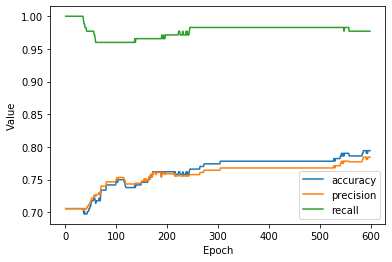

In [120]:
# Add precision and recall as metrics
#@title Double-click to view the solution for Task 3.

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
classification_threshold = 0.35
label_name = "Class_att"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, df_train_norm, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"] 
plot_curve(epochs, hist, list_of_metrics_to_plot)


# The new graphs suggest that precision and recall are 
# somewhat in conflict. That is, improvements to one of
# those metrics may hurt the other metric.

Train on 248 samples
Epoch 1/20
248/248 [==============================] - 1s 5ms/sample - loss: 0.6636 - accuracy: 0.6008 - precision: 0.8878 - recall: 0.4971
Epoch 2/20
248/248 [==============================] - 0s 339us/sample - loss: 0.6541 - accuracy: 0.6089 - precision: 0.8900 - recall: 0.5086
Epoch 3/20
248/248 [==============================] - 0s 323us/sample - loss: 0.6455 - accuracy: 0.6089 - precision: 0.8900 - recall: 0.5086
Epoch 4/20
248/248 [==============================] - 0s 307us/sample - loss: 0.6367 - accuracy: 0.6129 - precision: 0.8911 - recall: 0.5143
Epoch 5/20
248/248 [==============================] - 0s 325us/sample - loss: 0.6287 - accuracy: 0.6331 - precision: 0.8962 - recall: 0.5429
Epoch 6/20
248/248 [==============================] - 0s 348us/sample - loss: 0.6210 - accuracy: 0.6411 - precision: 0.8981 - recall: 0.5543
Epoch 7/20
248/248 [==============================] - 0s 366us/sample - loss: 0.6135 - accuracy: 0.6452 - precision: 0.8991 - recall: 0

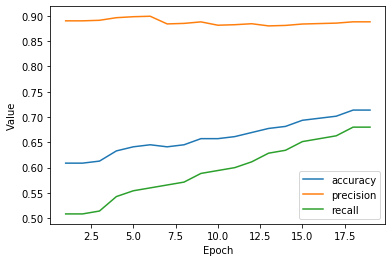

In [43]:
# Experiment with the classification threshold (if time permits)

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 10
classification_threshold = 0.52
label_name = "Class_att"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, df_train_norm, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"] 
plot_curve(epochs, hist, list_of_metrics_to_plot)

# A `classification_threshold` of slightly over 0.5
# appears to produce the highest accuracy (about 83%).
# Raising the `classification_threshold` to 0.9 drops 
# accuracy by about 5%.  Lowering the 
# `classification_threshold` to 0.3 drops accuracy by 
# about 3%. 

Train on 248 samples
Epoch 1/20
248/248 [==============================] - 1s 4ms/sample - loss: 0.5766 - auc: 0.8470
Epoch 2/20
248/248 [==============================] - 0s 76us/sample - loss: 0.5731 - auc: 0.8501
Epoch 3/20
248/248 [==============================] - 0s 53us/sample - loss: 0.5706 - auc: 0.8530
Epoch 4/20
248/248 [==============================] - 0s 60us/sample - loss: 0.5685 - auc: 0.8570
Epoch 5/20
248/248 [==============================] - 0s 70us/sample - loss: 0.5667 - auc: 0.8585
Epoch 6/20
248/248 [==============================] - 0s 69us/sample - loss: 0.5648 - auc: 0.8610
Epoch 7/20
248/248 [==============================] - 0s 67us/sample - loss: 0.5634 - auc: 0.8619
Epoch 8/20
248/248 [==============================] - 0s 80us/sample - loss: 0.5618 - auc: 0.8643
Epoch 9/20
248/248 [==============================] - 0s 66us/sample - loss: 0.5604 - auc: 0.8642
Epoch 10/20
248/248 [==============================] - 0s 56us/sample - loss: 0.5591 - auc: 0.8661

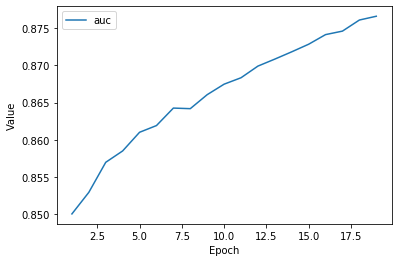

In [44]:
# Summarize model performance (if time permits)

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "Class_att"

# AUC is a reasonable "summary" metric for 
# classification models.
# Here is the updated definition of METRICS to 
# measure AUC:
METRICS = [
      tf.keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, df_train_norm, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['auc'] 
plot_curve(epochs, hist, list_of_metrics_to_plot)